# Basic Imports

In [7]:
import numpy as np  #load up the libraries and object defs. we need
import pandas as pd
from pandas import DataFrame, Series

# load up my visualization system, and call the object plt
import matplotlib.pyplot as plt

# tell ipython notebook to print visualizations inline
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [8]:
# A subset of data from the OECD Better Life Index (...and an incomplete one at that)
df = pd.read_excel('BetterLifeIndex.xlsx',skiprows=2) # Drop the non-data rows at the top

# Question 1
What country is the safest?

*Remember, you should be able to clearly **present** the result to an audience (and have them understand how you got it.)*

,Safety score
count,35.000000
mean,47.796466
std,13.639111
min,10.216183
25%,39.172002
50%,48.082125
75%,59.410697
max,70.706532


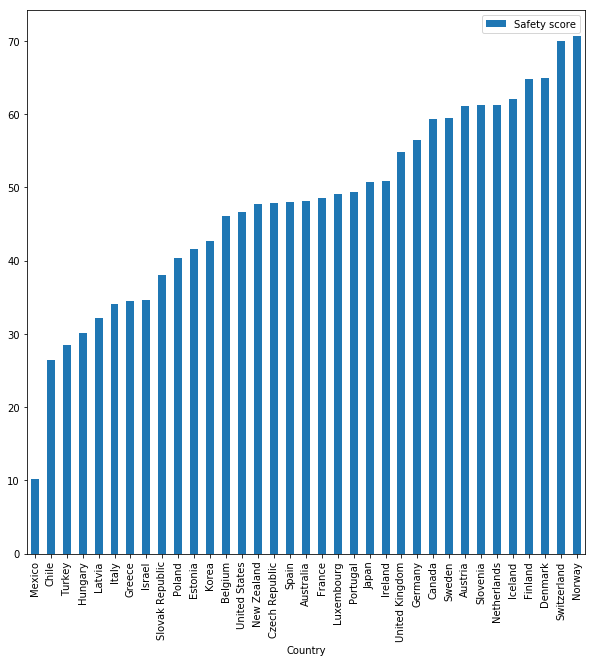

In [19]:
q1df = df

x = (100 - q1df['Air pollution']/100) * (q1df['Water quality']/100) * (q1df['Life expectancy']/100) * (q1df['Feeling safe walking alone at night']/100) 
nh = (q1df['Homicide rate'] - min(q1df['Homicide rate'])) / (max(q1df['Homicide rate']) - min(q1df['Homicide rate']))
q1df['Safety score'] = x - (nh*10)

safety = q1df[['Country','Safety score']].set_index('Country').sort_values('Safety score', ascending=True)
safety.plot(kind='bar', figsize=(10,10))
safety.describe()

# Question 2
On average what is the **life satisfaction** of the five countries with the **most years in education**?

In [4]:
sup = df.set_index("Life satisfaction")
sup = sup.sort_index()
sup = sup.head(5)
 
sup.describe()
sup.plot()

# Question 3
What is the distribution of life expectancy across OECD countries?
Are there other indicators with similar distributions? Do you think they are related?

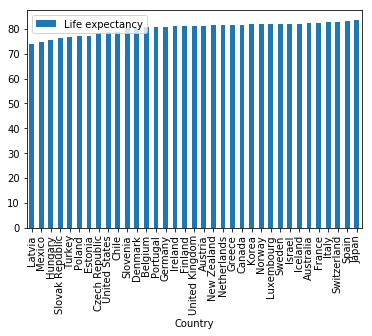

In [40]:


#df = pd.read_excel('BetterLifeIndex.xlsx',skiprows=2) # Drop the non-data rows at the top

hi = df[["Country", "Life expectancy"]].set_index("Country").sort_values("Life expectancy",ascending=True)
hi.plot(kind="bar")
#hi.boxplot(figsize=(90,90))
#varialbe.savefig("whatev.pdf")

# Question 4
Does water quality impact the employment rate?

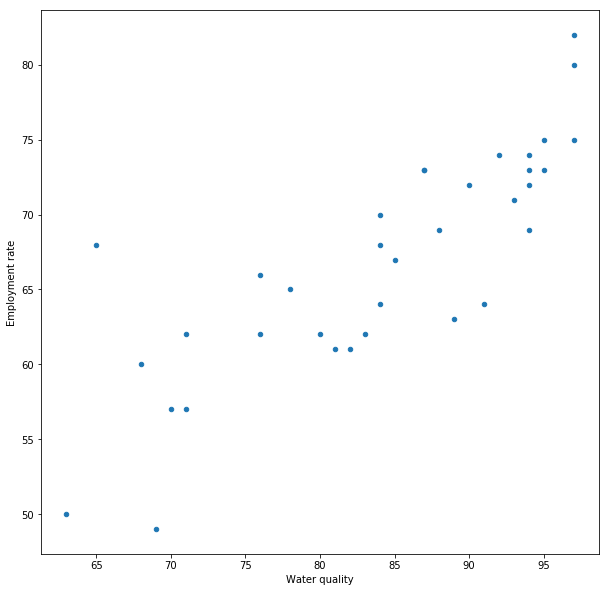

In [12]:
#hr = df["Homicide rate"] 
#fs = df["Feeling safe walking alone at night"] 
#df["Homicide rate_n"] = (hr-hr.min())/(hr.max()-hr.min())
#hu = "Feeling safe walking alone at night (normalized)"
#df[hu] = (fs-fs.min())/(fs.max()-fs.min())
#hello = df[[hu, "Homicide rate_n"]]
#hello.plot(kind="scatter", x=hu, y="Homicide rate_n")
#no?

#print(len(df.columns))
#len((df))
x1 = "Water quality"
y1 = "Employment rate"
ho = df[[x1,y1]]
ho.plot(kind="scatter", x = x1, y = y1, figsize=(10,10))



# Question 5
What is the correlation between years in education and employment rate?

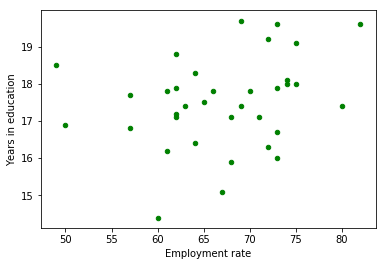

In [13]:
x = "Employment rate"
y = "Years in education"
ho = df[[x,y]]
ho.plot(kind="scatter", x=x, y=y, color= "green")
#ho.plot(kind="scatter", x=x, y="Student skills", color= "orange")